In [2]:
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt


X,lable = datasets.make_swiss_roll(n_samples=2000,random_state=0)
X = X.T
print(X.shape)

(3, 2000)


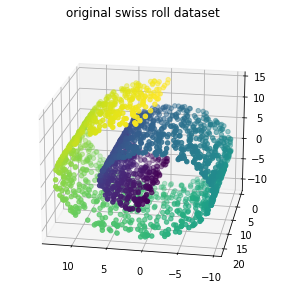

In [23]:
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1, 3, 1 , projection='3d')
ax1.scatter(X[0,:], X[1,:], X[2,:], c=lable)
ax1.view_init(20, 100)
ax1.set_title("original swiss roll dataset")
plt.show()

In [9]:
def distance_matrix(X):
    dim,num = X.shape
    D = np.zeros([num,num],np.float32)
    for i in range(num):
        for j in range(num):
            D[i,j] = np.dot((X[:,i]-X[:,j]).T,(X[:,i]-X[:,j]))**0.5
    return D

In [14]:
def k_nearest_neighbors(data, k = 10):
    D = distance_matrix(data)
    n = data.shape[1]
    N = np.zeros((n,k),dtype='int32')
    for i in range(n):
        sorted_ind = np.argsort(D[i,:])
        ind = sorted_ind[1:k+1]
        N[i] = N[i]+ind
    return N

In [11]:
def compute_similarity_matrix(data, N):
    d, n = data.shape
    k = len(N[1])
    e = np.ones((k,1),np.float32)
    W = np.zeros((n, n))
    eps = 1e-2
    for i in range(n):
        xi = np.reshape(data[:,i], [d,1])
        xiet = np.dot(xi, e.T)
        Ni = data[:,N[i]]
        Gi = np.dot((xiet - Ni).T, (xiet - Ni))
        Gi = Gi + eps*np.eye(k)
        inv_Gi = np.linalg.inv(Gi)
        wi = np.dot(inv_Gi, e)
        wi = wi / sum(wi)
        W[N[i],i] = wi[:,0]
    return W

In [12]:
def project_data(W, p = 2):
    n, _ = W.shape
    I = np.eye(n)
    M = np.dot((I-W),(I-W).T)
    U, sigma, _ = np.linalg.svd(M)
    U_p = U[:,-(p+1):-1]
    U_p = U_p[:,::-1]
    Y = U_p.T
    return Y

In [15]:
N = k_nearest_neighbors(X, k=10) # step 1: build k-nearest (k=10) neighbour graph
W = compute_similarity_matrix(X, N) # step 2: compute similarity matrix W
Y = project_data(W, p=2) # step 3: project data X to Y using W

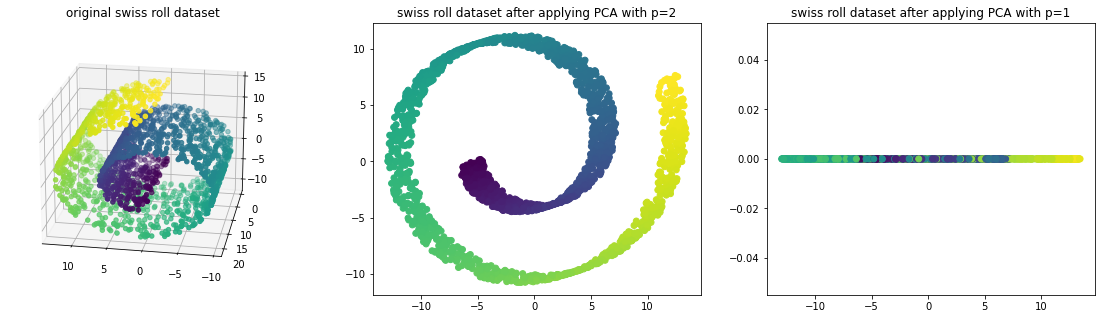

In [25]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=2)
PCA = sklearn_pca.fit_transform(X.T) 
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1, 3, 1 , projection='3d')
ax1.scatter(X[0,:], X[1,:], X[2,:], c = lable)
ax1.view_init(20, 100)
ax1.set_title("original swiss roll dataset")

ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(PCA[:, 0], PCA[:, 1], c = lable)
ax2.set_title("swiss roll dataset after applying PCA with p=2")

y_axis = np.zeros(2000)
ax3 = fig.add_subplot(133)
ax3.scatter(PCA[:, 0], y_axis, c = lable)
ax3.set_title("swiss roll dataset after applying PCA with p=1")
plt.show()

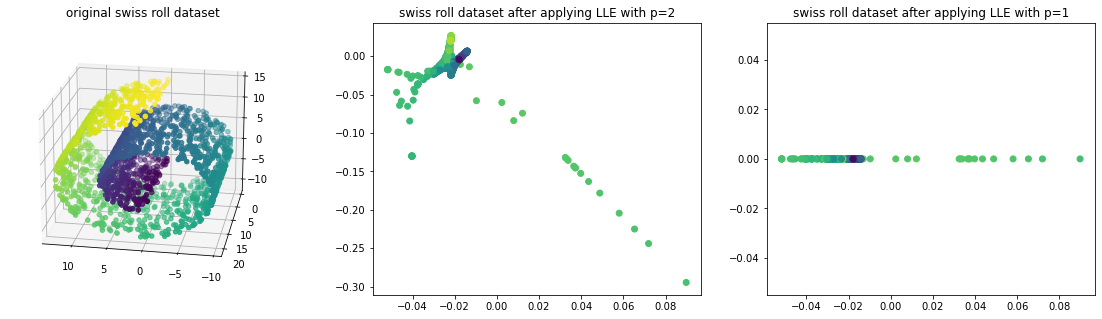

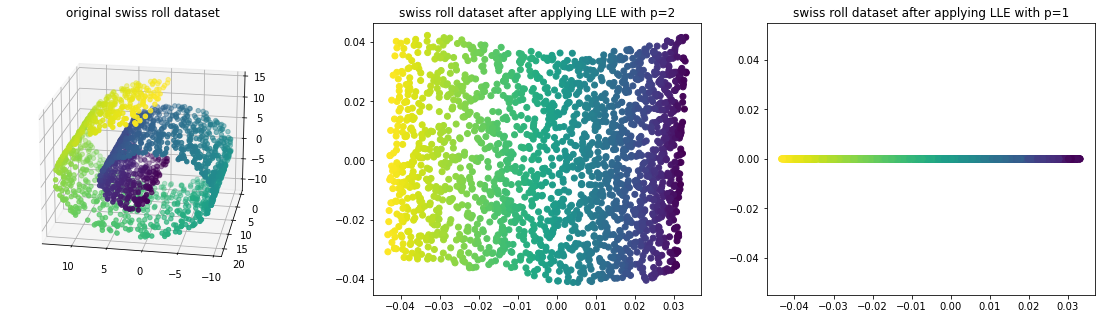

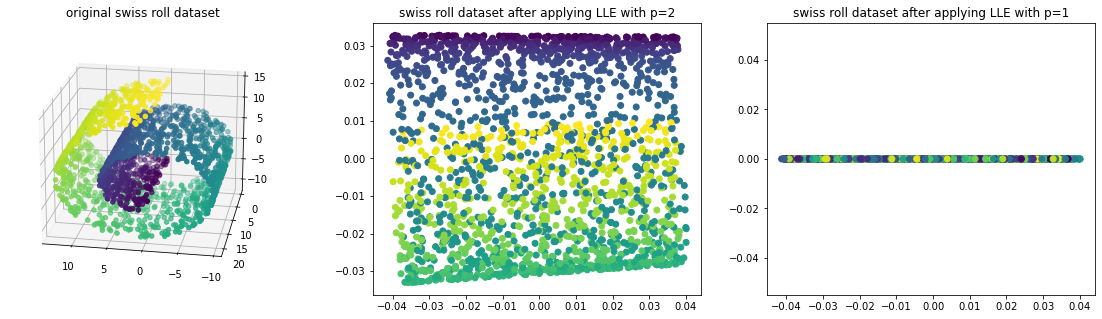

In [27]:
for k in [5,14,40]:
    
    N = k_nearest_neighbors(X, k) 
    W = compute_similarity_matrix(X, N)
    Y = project_data(W, p=2)

    fig = plt.figure(figsize=(20, 5))
    ax1 = fig.add_subplot(1, 3, 1 , projection='3d')
    ax1.scatter(X[0,:], X[1,:], X[2,:], c = lable)
    ax1.view_init(20, 100)
    ax1.set_title("original swiss roll dataset")

    ax2 = fig.add_subplot(1, 3, 2)
    ax2.scatter(Y[0, :], Y[1, :], c = lable)
    ax2.set_title("swiss roll dataset after applying LLE with p=2")

    y_axis = np.zeros(2000)
    ax3 = fig.add_subplot(133)
    ax3.scatter(Y[0, :], y_axis, c = lable)
    ax3.set_title("swiss roll dataset after applying LLE with p=1")

    plt.show()